In [1]:
## Reading the dataset
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
diabetes = pd.read_csv("processed_diabetes.csv")
print(diabetes.shape)
diabetes.head()

(768, 9)


,PregnantFreq,PlasmaGlucose,DiastolicBP,TricepSkinThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Target
0,6.0,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1.0,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8.0,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1.0,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0.0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


In [2]:
diabetes.shape

(768, 9)

### Decoupling "Target"

In [3]:
X = diabetes.loc[:,diabetes.columns.difference(['Target'])]
y = diabetes['Target']

In [4]:
y.value_counts()

0    500
1    268
Name: Target, dtype: int64

### Train-Test split

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=2324)

### Standardizing independent variables

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_std = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

### Checking summary statistics to verify standardization

In [7]:
X_train_std.describe()

,Age,BMI,DiabetesPedigree,DiastolicBP,PlasmaGlucose,PregnantFreq,SerumInsulin,TricepSkinThickness
count,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02
mean,-1.587805e-16,-1.637424e-16,-4.631098e-17,-1.111463e-15,-4.300305e-16,-9.923781e-18,-2.977134e-16,-5.954269e-17
std,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00
min,-1.062535e+00,-2.073153e+00,-1.182553e+00,-3.901109e+00,-2.189812e+00,-1.173398e+00,-1.706697e+00,-2.515918e+00
25%,-8.115833e-01,-7.028923e-01,-6.943776e-01,-7.011507e-01,-7.144832e-01,-8.770130e-01,-4.045946e-01,-4.856906e-01
50%,-3.096790e-01,-1.776200e-02,-3.153598e-01,-2.874464e-02,-1.444700e-01,-2.842427e-01,3.623793e-02,-1.722467e-02
75%,6.104789e-01,6.090594e-01,5.245437e-01,5.788328e-01,6.267244e-01,6.049127e-01,3.623793e-02,3.038423e-01
max,3.956507e+00,5.055118e+00,5.624608e+00,3.298798e+00,2.537945e+00,3.865149e+00,8.598512e+00,7.860800e+00


### Building a perceptron (single layer - single node)

In [8]:
import keras
from keras import regularizers, optimizers
from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

## Defining my optimizer - Its just a refined form of SGD
## ref - https://keras.io/optimizers/
adam = keras.optimizers.Adam(lr=0.01, decay=0.0005)


## Just a way to define neural nets. There are two ways sequential and functional
## Sequential model lets you add neural net layers one after another by calling function
model = Sequential()

## Adding one layer having only one neuron
## Notice our data has 8 input columns which goes into as the "input_shape" parameter
## Notice the use of l2 regularizer
model.add(Dense(1, input_shape=(8,), activation='sigmoid', kernel_regularizer=regularizers.l2()))

## Callbacks
earlystopper = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
reduce_lr = ReduceLROnPlateau(patience=5, verbose=1)

## Compiling the model and defining loss function
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

## Training neural nets
fitted_model = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=200, batch_size=16, callbacks=[reduce_lr, earlystopper])


Epoch 1/200
34/34 [==============================] - 0s 6ms/step - loss: 18.6648 - accuracy: 0.4618 - val_loss: 15.4218 - val_accuracy: 0.4329 - lr: 0.0100
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 11.6646 - accuracy: 0.4991 - val_loss: 14.0009 - val_accuracy: 0.4026 - lr: 0.0100
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 10.4769 - accuracy: 0.4786 - val_loss: 11.4441 - val_accuracy: 0.4242 - lr: 0.0100
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 8.5894 - accuracy: 0.4823 - val_loss: 9.3913 - val_accuracy: 0.3983 - lr: 0.0100
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 6.6512 - accuracy: 0.4842 - val_loss: 7.1150 - val_accuracy: 0.3983 - lr: 0.0100
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 5.0076 - accuracy: 0.4730 - val_loss: 5.3001 - val_accuracy: 0.3463 - lr: 0.0100
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - los

In [9]:
pd.DataFrame(fitted_model.history)

,loss,accuracy,val_loss,val_accuracy,lr
0,18.664755,0.461825,15.421762,0.432900,0.0100
1,11.664557,0.499069,14.000920,0.402597,0.0100
2,10.476890,0.478585,11.444057,0.424242,0.0100
3,8.589450,0.482309,9.391258,0.398268,0.0100
4,6.651205,0.484171,7.115016,0.398268,0.0100
5,5.007559,0.472998,5.300120,0.346320,0.0100
6,3.598540,0.446927,3.739484,0.303030,0.0100
7,2.489363,0.491620,2.453760,0.532468,0.0100
8,1.578712,0.441341,1.324448,0.497835,0.0100
9,0.988558,0.474860,0.774222,0.510823,0.0100


In [10]:
train_acc = fitted_model.history['accuracy']
train_loss = fitted_model.history['loss']

val_acc = fitted_model.history['val_accuracy']
val_loss = fitted_model.history['val_loss']

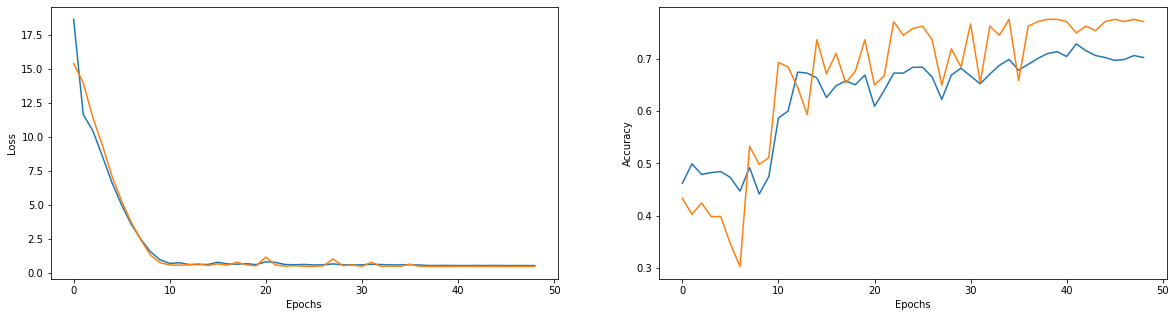

In [11]:
from matplotlib import pyplot as plt #plt is a visualization module in matplotlib.  
%matplotlib inline 
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(train_loss)
plt.plot(val_loss)

plt.subplot(1,2,2)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(train_acc)
plt.plot(val_acc)
plt.show()

In [ ]:
# !pip install graphviz
# !pip install ann_visualizer

In [13]:
from ann_visualizer.visualize import ann_viz
ann_viz(model,title="mlp neural network")

### Perceptron performance

In [14]:
from sklearn.metrics import accuracy_score
perceptron_train_preds = model.predict_classes(X_train)
perceptron_test_preds = model.predict_classes(X_test)

print("Train Accuracy :",accuracy_score(y_train,perceptron_train_preds))
print("Test_Accuray   : ",accuracy_score(y_test,perceptron_test_preds))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Train Accuracy : 0.7094972067039106
Test_Accuray   :  0.7705627705627706


### Checking Logistic Regression performance

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logistic_model = LogisticRegression(random_state=1234)

logistic_model.fit(X_train,y_train)

LogisticRegression(random_state=1234)

In [16]:
logistic_train_preds = logistic_model.predict(X_train)
logistic_test_preds = logistic_model.predict(X_test)

print("Train Accuracy :  ",accuracy_score(y_train,logistic_train_preds))
print("Test Accuracy  :  ",accuracy_score(y_test,logistic_test_preds))

Train Accuracy :   0.7653631284916201
Test Accuracy  :   0.7748917748917749


## Multilayer Perceptron

In [17]:
import keras
from keras import regularizers, optimizers
from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

## Defining my optimizer - Its just a refined form of SGD
## ref - https://keras.io/optimizers/
adam = keras.optimizers.Adam(lr=0.01, decay=0.0005)

## Just a way to define neural nets. There are two ways sequential and functional
## Sequential model lets you add neural net layers one after another by calling function
model = Sequential()

## Adding one layer having only one neuron
## Notice our data has 8 input columns which goes into as the "input_shape" parameter
## Notice the use of l2 regularizer
model.add(Dense(5, input_shape=(8,)))
model.add(Dense(8,))
model.add(Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2()))

## Callbacks
earlystopper = EarlyStopping(monitor='val_loss', patience=10)
reduce_lr = ReduceLROnPlateau(patience=5, verbose=1)

## Compiling the model and defining loss function
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

## Training neural nets
history = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=200, batch_size=16, callbacks=[reduce_lr, earlystopper])

Epoch 1/200
34/34 [==============================] - 0s 4ms/step - loss: 3.0123 - accuracy: 0.5270 - val_loss: 1.0651 - val_accuracy: 0.6017 - lr: 0.0100
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 0.7671 - accuracy: 0.6425 - val_loss: 0.8614 - val_accuracy: 0.6190 - lr: 0.0100
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 0.6867 - accuracy: 0.6294 - val_loss: 0.5919 - val_accuracy: 0.7186 - lr: 0.0100
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 0.6538 - accuracy: 0.6853 - val_loss: 0.6238 - val_accuracy: 0.6883 - lr: 0.0100
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 0.7314 - accuracy: 0.6574 - val_loss: 0.5504 - val_accuracy: 0.7403 - lr: 0.0100
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 0.7025 - accuracy: 0.6592 - val_loss: 1.2208 - val_accuracy: 0.6061 - lr: 0.0100
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 0.7

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 5)                 45        
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 48        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 102
Trainable params: 102
Non-trainable params: 0
_________________________________________________________________


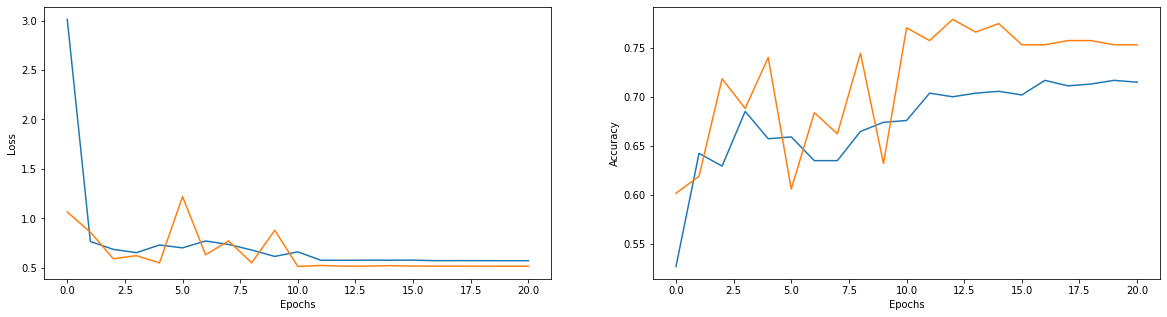

In [19]:
train_acc = history.history['accuracy']
train_loss = history.history['loss']

val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

from matplotlib import pyplot as plt #plt is a visualization module in matplotlib.  
%matplotlib inline 
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(train_loss)
plt.plot(val_loss)

plt.subplot(1,2,2)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(train_acc)
plt.plot(val_acc)

In [20]:
ann_viz(model,title="mlp neural network")

In [21]:
from sklearn.metrics import accuracy_score
mlp_train_preds = model.predict_classes(X_train)
mlp_test_preds = model.predict_classes(X_test)

print("Train Accuracy :  ",accuracy_score(y_train,mlp_train_preds))
print("Test Accuracy  :  ",accuracy_score(y_test,mlp_test_preds))

Train Accuracy :   0.7150837988826816
Test Accuracy  :   0.7532467532467533


## SKLEARN MLP CLASSIFIER

In [22]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(activation='logistic',batch_size=64,random_state=1234,hidden_layer_sizes=(21,))
model.fit(X_train,y_train)

MLPClassifier(activation='logistic', batch_size=64, hidden_layer_sizes=(21,),
              random_state=1234)

In [23]:
from sklearn.metrics import accuracy_score
sklearn_mlp_train_preds = model.predict(X_train)
sklearn_mlp_test_preds = model.predict(X_test)

print("Train Accuracy  :  ",accuracy_score(y_train,sklearn_mlp_train_preds))
print("Test Accuracy   :  ",accuracy_score(y_test,sklearn_mlp_test_preds))

Train Accuracy  :   0.74487895716946
Test Accuracy   :   0.7359307359307359


## Grid Search CV

#### Scoring with recall-score

In [24]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score,recall_score

mlp_grid=  MLPClassifier(activation='logistic',random_state=1234)
# Use a grid over parameters of interest


param_grid = {"batch_size" : [16, 32, 64, 128],
           "hidden_layer_sizes" : [(11,), (15,), (19,),(21,)],
           "max_iter" : [50, 100, 150, 200]}
 
mlp_cv_grid = GridSearchCV(estimator = mlp_grid, param_grid = param_grid, cv = 3,
                                scoring = make_scorer(lambda yt,yp: recall_score(yt,yp,pos_label = 1)))
mlp_cv_grid.fit(X_train, y_train)
mlp_cv_grid.best_estimator_

MLPClassifier(activation='logistic', batch_size=32, hidden_layer_sizes=(15,),
              random_state=1234)

In [25]:
sklearn_mlp_train_preds = mlp_cv_grid.best_estimator_.predict(X_train)
sklearn_mlp_test_preds = mlp_cv_grid.best_estimator_.predict(X_test)

print("Train Accuracy  :  ",accuracy_score(y_train,sklearn_mlp_train_preds))
print("Test Accuracy   :  ",accuracy_score(y_test,sklearn_mlp_test_preds))

Train Accuracy  :   0.7467411545623837
Test Accuracy   :   0.7532467532467533


#### Scoring with Accuracy

In [26]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score

mlp_grid=  MLPClassifier(activation='logistic',random_state=1234)
# Use a grid over parameters of interest


param_grid = {"batch_size" : [16, 32, 64, 128],
           "hidden_layer_sizes" : [(11,), (15,), (19,),(21,)],
           "max_iter" : [50, 100, 150, 200]}
 
mlp_cv_grid = GridSearchCV(estimator = mlp_grid, param_grid = param_grid, cv = 3,
                                scoring = 'accuracy')
mlp_cv_grid.fit(X_train, y_train)
mlp_cv_grid.best_estimator_

MLPClassifier(activation='logistic', batch_size=64, hidden_layer_sizes=(19,),
              random_state=1234)

In [27]:
sklearn_mlp_train_preds = mlp_cv_grid.best_estimator_.predict(X_train)
sklearn_mlp_test_preds = mlp_cv_grid.best_estimator_.predict(X_test)

print("Train Accuracy  :  ",accuracy_score(y_train,sklearn_mlp_train_preds))
print("Test Accuracy   :  ",accuracy_score(y_test,sklearn_mlp_test_preds))

Train Accuracy  :   0.7281191806331471
Test Accuracy   :   0.7445887445887446
